# Pymaceuticals Inc.
---

### Analysis

The summary evaluated the effectiveness of four treatment options in reducing tumor volume in mice. Capomulin and Ramicane have the most promising results to reduce tumor volume in comparison to Infubinol and Ceftamin. It appears weight and tumor volume determine the effectiveness of Campomulin. Infubinol showed potential outliers in tumor volume data, suggesting variability in treatment response among mice.

Summary Statistics Table provides mean, median, variance, standard deviation, and SEM of tumor volume for each treatment regimen.

Box Plot shows the distribution of tumor volume for each treatment group.

Line Plot displays tumor volume versus time point for a single mouse treated with Capomulin.

Scatter Plot illustrates the relationship between mouse weight and average observed tumor volume for the entire Capomulin regimen.

Correlation Coefficient presents the correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen.

Linear Regression provides the slope and intercept of the linear regression line for mouse weight and tumor volume.

Including visualizations in the report, stakeholders can gain a better insight into the effectiveness of different treatment options and understand the response dependent on mouse weight and tumor response. 


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\Jessi\OneDrive\Desktop\Starter_Code 5\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\Jessi\OneDrive\Desktop\Starter_Code 5\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merged_df.head())



  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [15]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
print("Number of mice:", num_mice)


Number of mice: 249


In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate mice by ID number:")
print(duplicate_mice)


Duplicate mice by ID number:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
91

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] != duplicate_mouse_id]

# Verify the cleaned DataFrame
print("Cleaned DataFrame after dropping the duplicate mouse ID:")
print(cleaned_df.head())


Cleaned DataFrame after dropping the duplicate mouse ID:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [18]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_df['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame:", num_mice_cleaned)


Number of mice in the clean DataFrame: 248


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen' and calculate summary statistics
summary_statistics = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print(summary_statistics)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method to produce summary statistics in a single line
summary_statistics_advanced = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns for clarity
summary_statistics_advanced.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print(summary_statistics_advanced)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

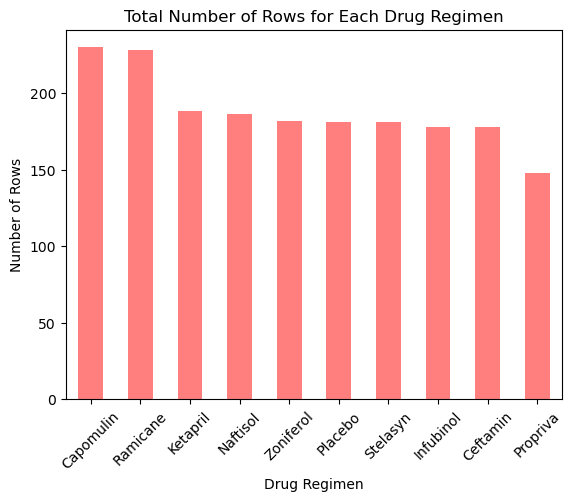

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot using Pandas
bar_data = cleaned_df['Drug Regimen'].value_counts()
bar_data.plot(kind='bar', color='red', alpha=0.5)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()


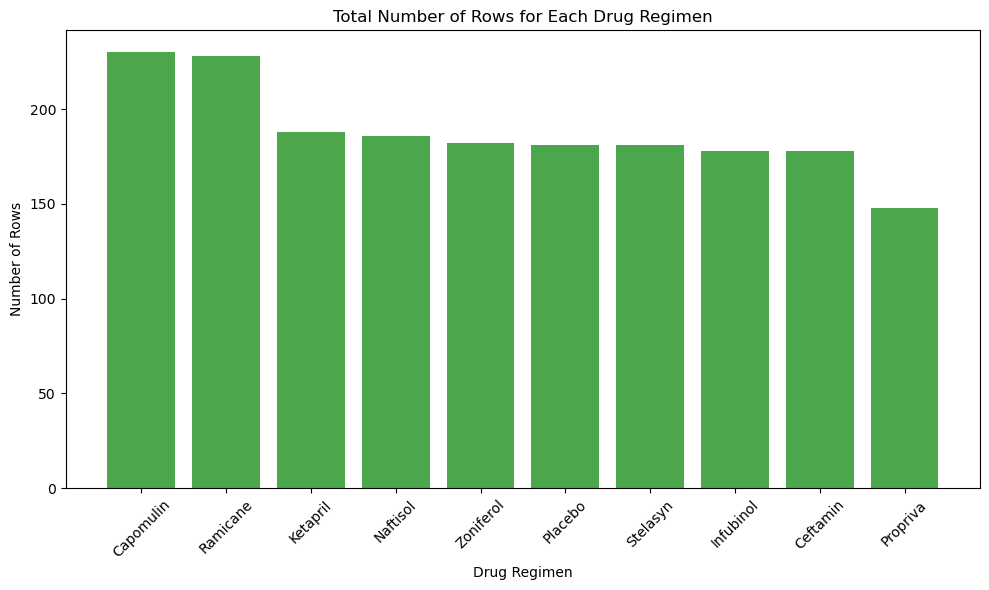

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Total number of rows (Mouse ID/Timepoints) for each drug regimen
bar_data = cleaned_df['Drug Regimen'].value_counts()

# Generate a bar plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(bar_data.index, bar_data.values, color='green', alpha=0.7)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


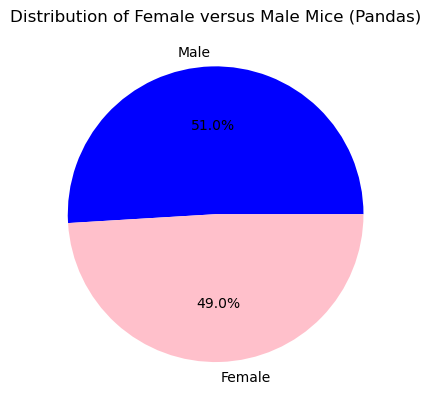

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Distribution of female versus male mice
pie_data = cleaned_df['Sex'].value_counts()

# Generate a pie plot using Pandas
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Female versus Male Mice (Pandas)')
plt.ylabel('')
plt.show()


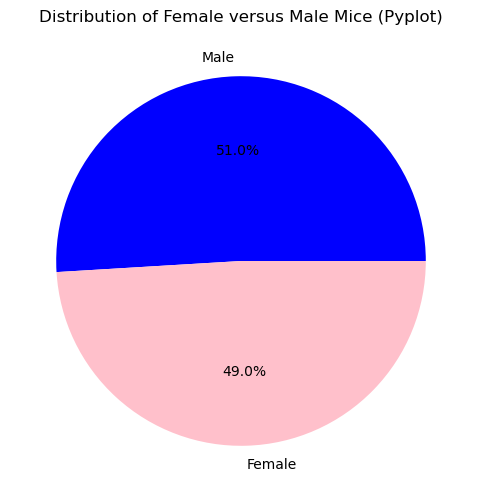

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Distribution of female versus male mice
pie_data = cleaned_df['Sex'].value_counts()

# Generate a pie plot using Matplotlib's pyplot
plt.figure(figsize=(6, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Female versus Male Mice (Pyplot)')
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter the DataFrame to include only the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame containing the final tumor volume for each mouse
print(final_tumor_volume)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
238     y769         45     Ceftamin  Female           6          27   
239     y793         45    Capomulin    Male          17          17   
240     y865         45     Ceftamin    Male          23          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print summary statistics and potential outliers for each treatment regimen
    print(f"Summary statistics for {treatment}:")
    print(f"Lower Quartile (Q1): {lower_q}")
    print(f"Upper Quartile (Q3): {upper_q}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers}")
    print("")

# Print the list of tumor volume data for plotting
print("Tumor volume data for plotting:")
print(tumor_vol_data)


Summary statistics for Capomulin:
Lower Quartile (Q1): 32.37735684
Upper Quartile (Q3): 40.1592203
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Ramicane:
Lower Quartile (Q1): 31.56046955
Upper Quartile (Q3): 40.65900627
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Infubinol:
Lower Quartile (Q1): 54.04860769
Upper Quartile (Q3): 65.52574285
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Ceftamin:
Lower Quartile (Q1): 48.72207785
Upper Quartile (Q3): 64.29983003
Interquartile Range (IQR): 15.577752179999997
Lower Bound: 25.3554

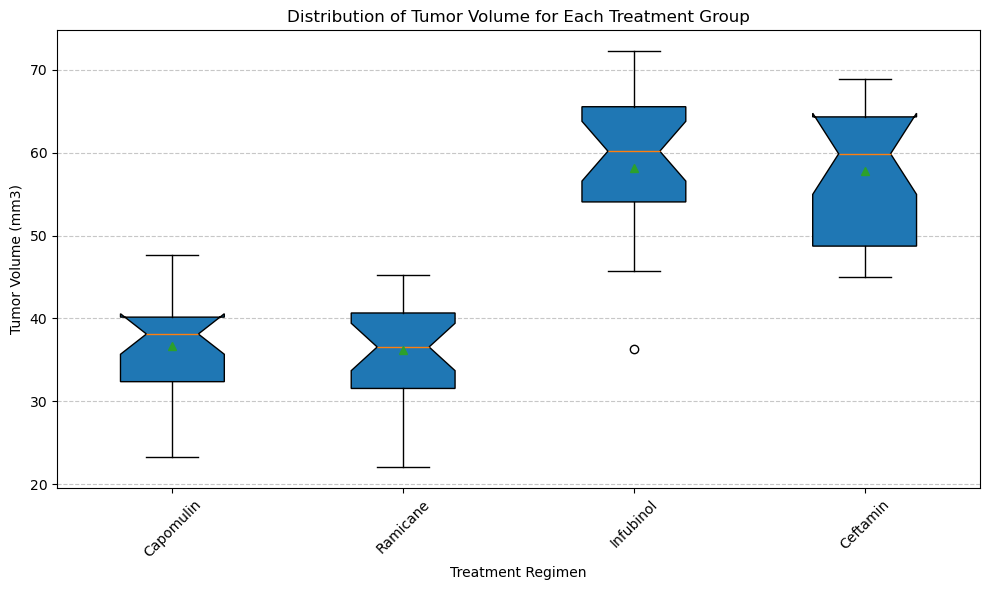

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, notch=True, vert=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Line and Scatter Plots

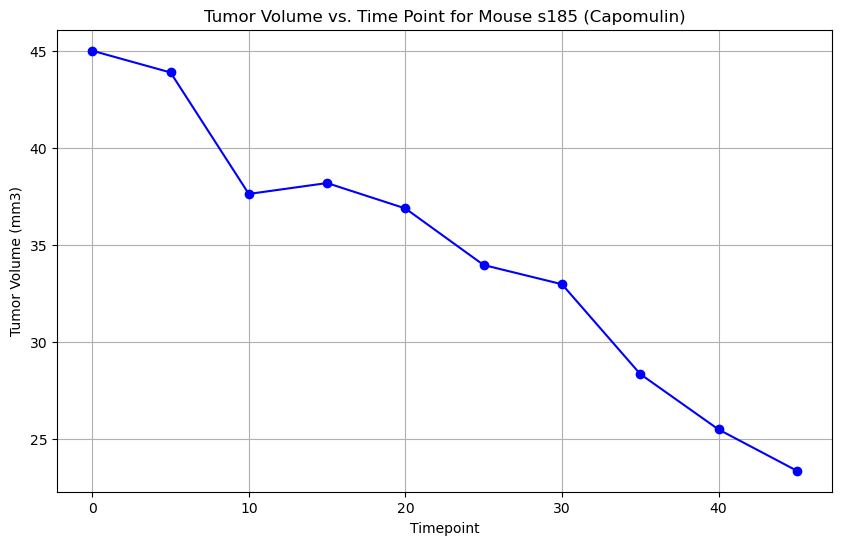

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Select the first mouse for example purposes

# Filter the data for the selected mouse
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


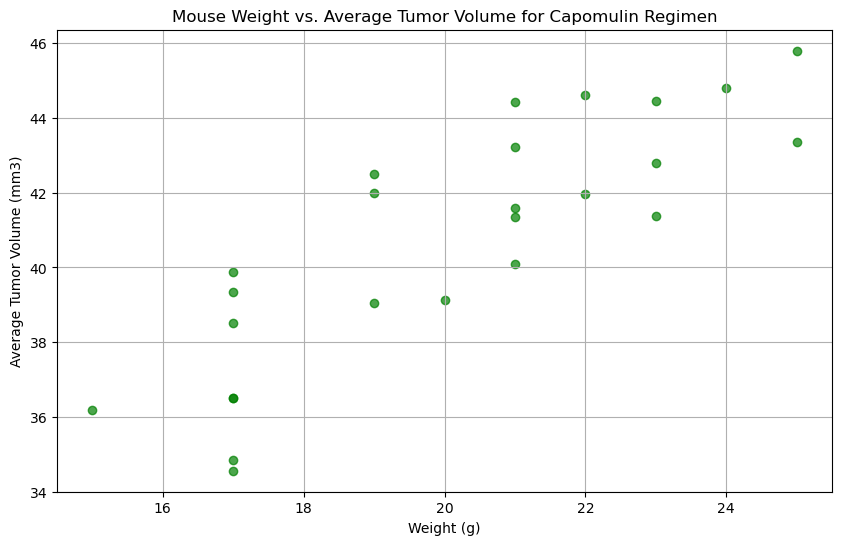

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the Capomulin data by Mouse ID and calculate the average tumor volume and weight
capomulin_avg_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='green', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)


Correlation Coefficient: 0.841936342469472
Slope: 0.9544396890241049
Intercept: 21.552160532685008
